<a href="https://colab.research.google.com/github/ashi-agrawal-06/Banking-classifier-ml/blob/main/banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*First we begin with importing the libraries*
**The libraries in the cell below will help us to select the best features required for a good result and ouput from the dataset**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier


The dataset below has been taken from **Kaggle.com**

Our data is contaied in the file 'banking.csv' which is a comma seperated file

We will use the *read_csv* function of the pandas library to read the file



In [ ]:
df=pd.read_csv('banking.csv')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

# Analysis of the variables

**STUDY OF NUMERICAL FEATURES**

Text(0.5, 1.0, 'Age bins')

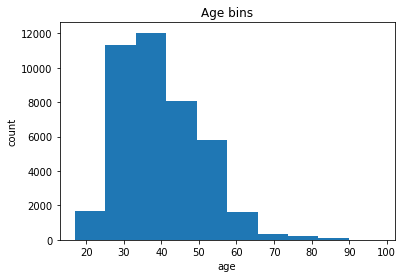

In [ ]:
plt.hist(df['age'])
# set x/y labels and plot title
plt.xlabel("age")
plt.ylabel("count")
plt.title("Age bins")

In [ ]:
bins=np.linspace(min(df["age"]), max(df["age"]), 6)
bins

array([17. , 33.2, 49.4, 65.6, 81.8, 98. ])

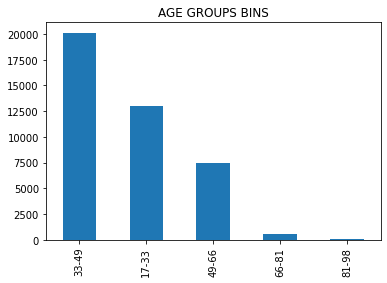

In [ ]:
age_groups=['17-33','33-49','49-66','66-81','81-98']
df['age_binned']=pd.cut(df['age'],bins,labels=age_groups, include_lowest=True)
df["age_binned"].value_counts().plot.bar()
plt.title('AGE GROUPS BINS')
df.drop("age_binned",axis=1,inplace=True)

Text(0.5, 1.0, 'Duration')

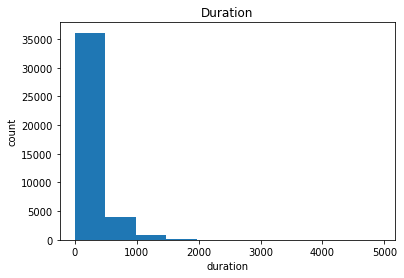

In [ ]:
plt.hist(df['duration'])
# set x/y labels and plot title
plt.xlabel("duration")
plt.ylabel("count")
plt.title("Duration")

Text(0.5, 1.0, 'CAMPAIGN')

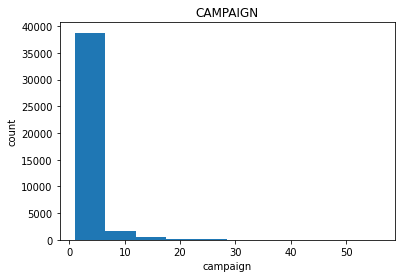

In [ ]:
plt.hist(df['campaign'])
plt.xlabel("campaign")
plt.ylabel("count")
plt.title("CAMPAIGN")

Text(0.5, 1.0, 'Pdays')

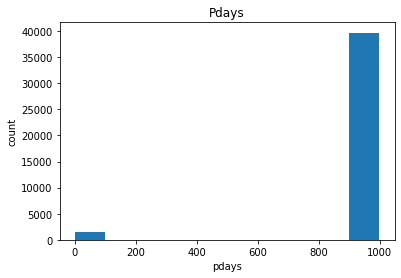

In [ ]:
plt.hist(df['pdays'])
plt.xlabel("pdays")
plt.ylabel("count")
plt.title("Pdays")

Text(0.5, 1.0, 'PREVIOUS')

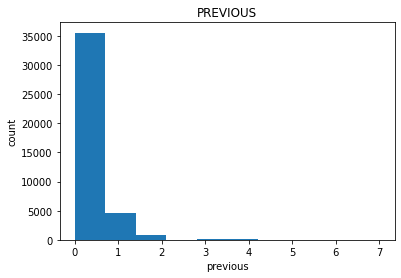

In [ ]:
plt.hist(df['previous'])
# set x/y labels and plot title
plt.xlabel("previous")
plt.ylabel("count")
plt.title("PREVIOUS")

Other similar plots

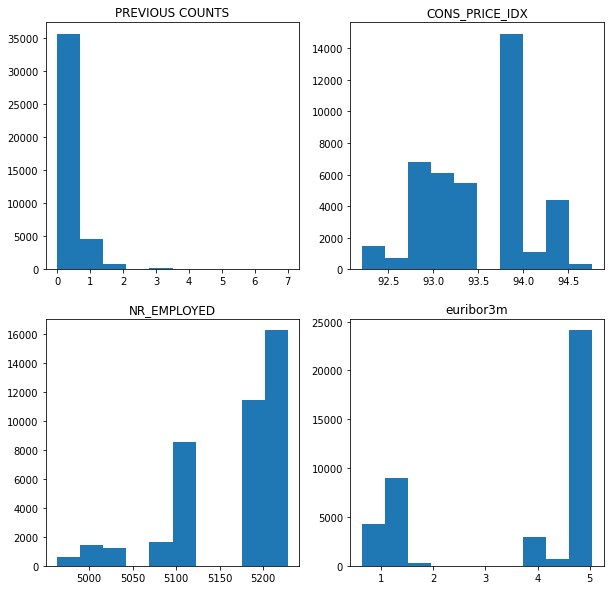

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(221) #0,0
plt.hist(df['previous'])
plt.title('PREVIOUS COUNTS')
plt.subplot(222) #0,1
plt.hist(df['cons_price_idx'])
plt.title('CONS_PRICE_IDX')
plt.subplot(223) #1,0
plt.hist(df['nr_employed'])
plt.title('NR_EMPLOYED')
plt.subplot(224) #1,1
plt.hist(df['euribor3m'])
plt.title('euribor3m')
plt.show()
plt.savefig('example.jpg',bbox='tight')

**OBJECTIVE TYPE VARIABLE PLOTS**

Text(0.5, 1.0, 'Month Counts')

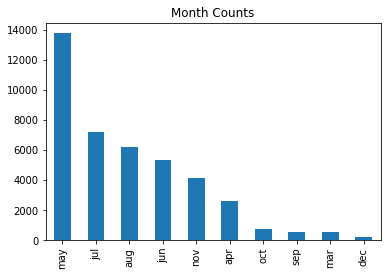

In [ ]:
df['month'].value_counts().plot.bar()
plt.title('Month Counts')

Text(0.5, 1.0, 'Job Counts')

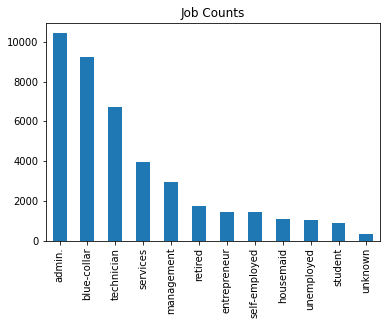

In [ ]:
df['job'].value_counts().plot.bar()
plt.title('Job Counts')

Text(0.5, 1.0, 'Education Status')

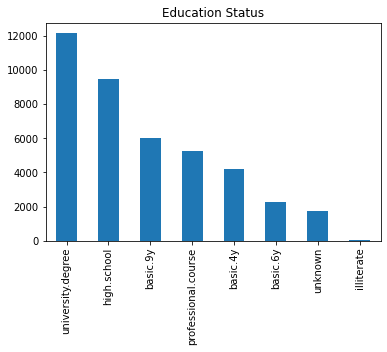

In [ ]:
df['education'].value_counts().plot.bar()
plt.title('Education Status')

Text(0.5, 1.0, 'Default Counts')

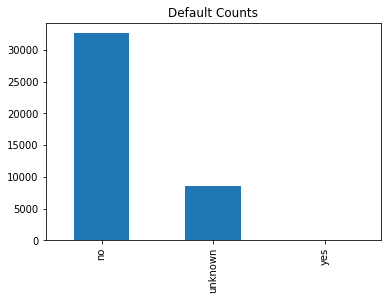

In [ ]:
df['default'].value_counts().plot.bar()
plt.title('Default Counts')

Text(0.5, 1.0, 'Housing Status')

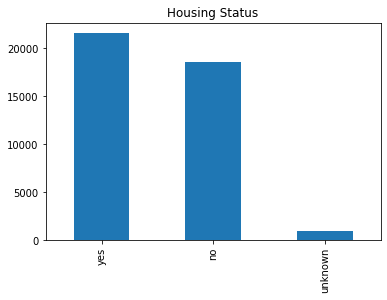

In [ ]:
df['housing'].value_counts().plot.bar()
plt.title('Housing Status')

Text(0.5, 1.0, 'Loan Status')

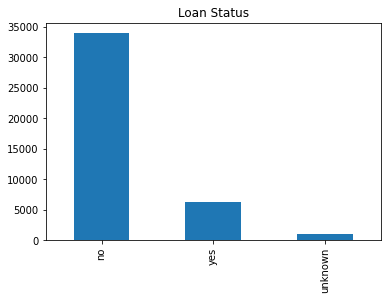

In [ ]:
df['loan'].value_counts().plot.bar()
plt.title('Loan Status')

Text(0.5, 1.0, 'Contact Details')

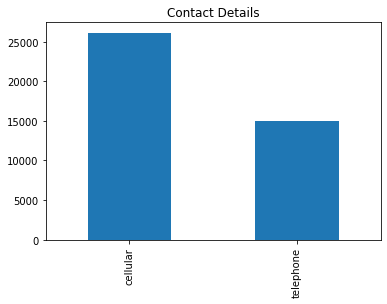

In [ ]:
df['contact'].value_counts().plot.bar()
plt.title('Contact Details')

Text(0.5, 1.0, 'Month Counts')

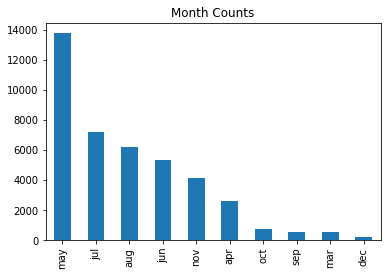

In [ ]:
df['month'].value_counts().plot.bar()
plt.title('Month Counts')

Text(0.5, 1.0, 'DAYS COUNTS')

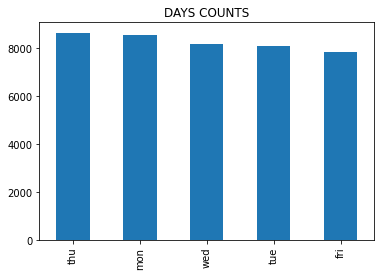

In [ ]:
df['day_of_week'].value_counts().plot.bar()
plt.title('DAYS COUNTS')

Text(0.5, 1.0, 'OUTCOME')

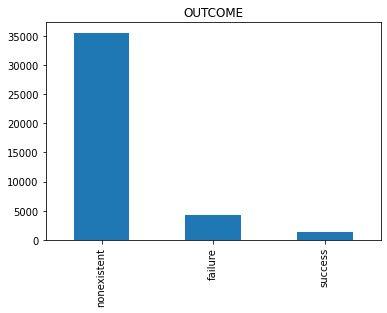

In [ ]:
df['poutcome'].value_counts().plot.bar()
plt.title('OUTCOME')

Analysis of the dependent variable 'Y'

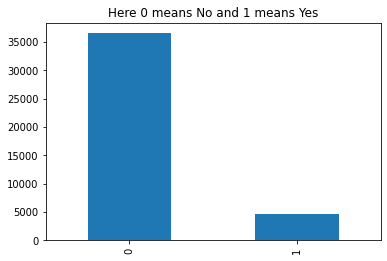

In [ ]:
df['y'].value_counts().plot.bar()
plt.title('Here 0 means No and 1 means Yes')
plt.show()

So the dataset contains 21 columns 41188 rows

Since no column has any missing values(as we can see all the columns have 41188 non-null values), hence the dataset is cLeaned so we can proceed with further preprocessing

# **DATA SCALING/ DATA NORMALIZATION**

In the cell below we have stored all the maximum values for any particular integer/floar type column so as to easily scale the values to be predicted or if any new entry is made to the dataset.

Simulatenously we are also performing scaling by dividing each value with the maximum value of the column(for integer type columns). We could have also used StandardScaler() of the preprocessing class instead of this technique. But since we are considered with the analysis part and feature selection and not just building prediction model directly, this technique is often at time preferred. The scaling is done only on the independent columns. Here column 'y' is our dependent column. 

In [ ]:
d={}
for i in df.columns:
  if df[i].dtype=='float64' or df[i].dtype=='int64':
    if i=='y':
      continue
    d.update({i:df[i].max()})
    df[i]=df[i]/df[i].max()
           

In [ ]:
d

{'age': 98,
 'campaign': 56,
 'cons_conf_idx': -26.9,
 'cons_price_idx': 94.76700000000001,
 'duration': 4918,
 'emp_var_rate': 1.4,
 'euribor3m': 5.045,
 'nr_employed': 5228.1,
 'pdays': 999,
 'previous': 7}

Below is now our scaled dataset.

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0.448980,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,0.042700,0.017857,1.000000,0.000000,nonexistent,1.000000,0.986039,1.342007,0.983746,1.000000,0
1,0.540816,technician,married,unknown,no,no,no,cellular,nov,fri,0.028060,0.017857,1.000000,0.000000,nonexistent,-0.071429,0.983465,1.561338,0.797027,0.993822,0
2,0.285714,management,single,university.degree,no,yes,no,cellular,jun,thu,0.068930,0.053571,0.006006,0.285714,success,-1.214286,0.992487,1.479554,0.144500,0.954764,1
3,0.397959,services,married,high.school,no,no,no,cellular,apr,fri,0.037617,0.035714,1.000000,0.000000,nonexistent,-1.285714,0.982146,1.750929,0.278494,0.975326,0
4,0.561224,retired,married,basic.4y,no,yes,no,cellular,aug,fri,0.027857,0.017857,0.003003,0.142857,success,-2.071429,0.972923,1.167286,0.172250,0.970945,1


# **LABEL ENCODING**

Now, after scaling we will perform label encoding on the *object* type columns

class sklearn.preprocessing.LabelEncoder can:
  
1.  Encode target labels with value between 0 and n_classes-1 
2.  LabelEncoder can be used to normalize labels.
3.  It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.



In [ ]:
from sklearn.preprocessing import LabelEncoder

Since we have 10 object type columns in our dataset so we will label encode the 10 columns. In the cell above we have imported the LabelEncoder feature of the preprocessing from sklearn. 

Now, we will create 10 objects of the LabelEnocder() 

In [ ]:
n1=LabelEncoder()
n2=LabelEncoder()
n3=LabelEncoder()
n4=LabelEncoder()
n5=LabelEncoder()
n6=LabelEncoder()
n7=LabelEncoder()
n8=LabelEncoder()
n9=LabelEncoder()
n10=LabelEncoder()

    

We have done labelecoding on these many columns:

In [ ]:
for i in df.columns:
  if df[i].dtype=='O':
    print(i)

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome


Now we will perform the encoding using fit_transform()

In [ ]:
df["job"]=n1.fit_transform(df["job"])

In [ ]:
df["marital"]=n2.fit_transform(df["marital"])
df["education"]=n3.fit_transform(df["education"])
df["default"]=n4.fit_transform(df["default"])
df["housing"]=n5.fit_transform(df["housing"])
df["loan"]=n6.fit_transform(df["loan"])
df["contact"]=n7.fit_transform(df["contact"])
df["month"]=n8.fit_transform(df["month"])
df["day_of_week"]=n9.fit_transform(df["day_of_week"])
df["poutcome"]=n10.fit_transform(df["poutcome"])


Since columns 'emp_var_rate' has very fluctuating negative values so we will drop it 

In [ ]:
df.drop("emp_var_rate",axis=1,inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0.448980,1,1,0,1,2,0,0,1,2,0.042700,0.017857,1.000000,0.000000,1,0.986039,1.342007,0.983746,1.000000,0
1,0.540816,9,1,7,0,0,0,0,7,0,0.028060,0.017857,1.000000,0.000000,1,0.983465,1.561338,0.797027,0.993822,0
2,0.285714,4,2,6,0,2,0,0,4,2,0.068930,0.053571,0.006006,0.285714,2,0.992487,1.479554,0.144500,0.954764,1
3,0.397959,7,1,3,0,0,0,0,0,0,0.037617,0.035714,1.000000,0.000000,1,0.982146,1.750929,0.278494,0.975326,0
4,0.561224,5,1,0,0,2,0,0,1,0,0.027857,0.017857,0.003003,0.142857,2,0.972923,1.167286,0.172250,0.970945,1


In [ ]:
dfcorr=df.corr()

In [ ]:
dfcorr['y']

age               0.030399
job               0.025122
marital           0.046203
education         0.057799
default          -0.099352
housing           0.011552
loan             -0.004909
contact          -0.144773
month            -0.006065
day_of_week       0.015967
duration          0.405274
campaign         -0.066357
pdays            -0.324914
previous          0.230181
poutcome          0.129789
cons_price_idx   -0.136211
cons_conf_idx    -0.054878
euribor3m        -0.307771
nr_employed      -0.354678
y                 1.000000
Name: y, dtype: float64

In [ ]:
dfcorr.style.background_gradient()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,-0.000866,0.004594,-0.034369,0.024365,0.019750,0.000857,-0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006490,-0.006923,-0.028468,0.020965,0.011504,-0.016017,-0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,0.010290,-0.007240,-0.037942,0.038689,0.001912,-0.057477,0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,-0.015102,0.000371,-0.046626,0.038831,0.017009,-0.081607,-0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011794,0.032825,0.080062,-0.102416,0.023417,0.168073,-0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.007658,-0.011010,-0.010551,0.021314,-0.011783,-0.080504,0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000916,0.005166,0.000345,-0.001327,-0.001511,-0.002430,0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.026657,0.077368,0.117970,-0.212848,0.118744,0.591474,-0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.003690,-0.062059,-0.047891,0.103157,-0.065012,-0.004239,-0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.021950,-0.038288,-0.009531,-0.004102,0.018732,0.005644,-0.041465,0.039043,0.028380,0.015967


As we can see that the correlation values are weak(less than 0.5), hence correlation is not useful. Also correlation is not aprropriate fir selecting important columns in case of classification problems.

Correlation and Causation are applied for regression models where we have mainly predict a numerical value 

Now we will try various feature selection algorithms to get the important variables amongs the independent columns and with each selection process we will find our the results of many classification models using various classifiers

## **FEATURE SELECTION**

# ***1. Univariate Selection***

---



---



Univariate feature selection works by selecting the best features based on univariate statistical tests. We compare each feature to the target variable, to see whether there is any statistically significant relationship between them. It is also called analysis of variance (ANOVA). When we analyze the relationship between one feature and the target variable, we ignore the other features. That is why it is called ‘univariate’. Each feature has its test score.
Finally, all the test scores are compared, and the features with top scores will be selected.

Next we use *chi-square test.*
The Chi Square statistic is commonly used for testing relationships between categorical variables. The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent.

In [ ]:
X1=df.iloc[:,:-1].values
Y1=df.iloc[:,-1].values

In [ ]:
test=SelectKBest(score_func=chi2,k=3)# no of columns we want
test.fit(X1,Y1)

SelectKBest(k=3, score_func=<function chi2 at 0x7f092ba15268>)

In [ ]:
high={}
np.set_printoptions(precision=3)
for col,val in zip(df.columns,test.scores_):
    high.update({col:val})

In [ ]:
import operator
sorted(high.items(),key=operator.itemgetter(1),reverse=True)

[('euribor3m', 642.4130984239608),
 ('contact', 547.9583093880087),
 ('previous', 441.4532037216673),
 ('duration', 358.0181229427213),
 ('default', 321.9229031035162),
 ('education', 167.60728300206605),
 ('pdays', 157.98375310277154),
 ('poutcome', 98.23117431597791),
 ('job', 90.17553267281917),
 ('marital', 27.79559829132918),
 ('day_of_week', 10.231444571849314),
 ('campaign', 9.678069449744278),
 ('housing', 4.978734333542827),
 ('cons_conf_idx', 2.4386220950327857),
 ('month', 1.9272840371275475),
 ('loan', 1.587004275347953),
 ('age', 1.0538178077288793),
 ('nr_employed', 1.0012397626468104),
 ('cons_price_idx', 0.028872405656631076)]

The best features(columns) suggested by the Univariate technique are the columns: *'euribor3m', 'contact', 'previous'*

Now we will apply all the classification algorithms taking these 3 columns as the independent variables to predict our independent variable 'y'

**X** holds **independent variables.**
**Y** holds the dependent column **y**

In [ ]:
X=df[["euribor3m","contact","previous"]].values

In [ ]:
Y=df.iloc[:,-1].values

In [ ]:
X

array([[0.984, 0.   , 0.   ],
       [0.797, 0.   , 0.   ],
       [0.144, 0.   , 0.286],
       ...,
       [0.963, 1.   , 0.   ],
       [0.147, 1.   , 0.   ],
       [0.963, 1.   , 0.   ]])

In [ ]:
Y

array([0, 0, 1, ..., 0, 0, 0])

# **Training and Test Sets: Splitting Data**

Training data and test data are two important concepts in machine learning.

**Training Data** : The observations in the training set form the experience that the algorithm uses to learn. In supervised learning problems, each observation consists of an observed output variable and one or more observed input variables.
**Testing Data** : The test set is a set of observations used to evaluate the performance of the model using some performance metric. It is important that no observations from the training set are included in the test set. If the test set does contain examples from the training set, it will be difficult to assess whether the algorithm has learned to generalize from the training set or has simply memorized it.

**Cross-Validation** : *random_state* as the name suggests, is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices.This is to check and validate the data when running the code multiple times. Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code. And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output.
So to ensure best results of the shuffling the random_state is used here.

In [ ]:
from sklearn.model_selection import train_test_split

## **Logistic Regression**

Logistic regression is named for the function used at the core of the method, the logistic function.

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

1 / (1 + e^-value)

In [ ]:
from sklearn.linear_model import LogisticRegression

In the cell below we are performing the splitting of the dataset into training and testing simultaenously with performing logistic regression. We are doing this in a loop from 1 to 50 to find out the best random_state at which our model gives the best output. 

In [ ]:
lar={}
for i in range(1,50):
  Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
  logreg=LogisticRegression(solver='lbfgs')
  logreg.fit(Xtrain,Ytrain)
  sc=logreg.score(Xtest,Ytest)*100
  lar.update({i:sc})

In [ ]:
import operator
sorted(lar.items(),key=operator.itemgetter(1),reverse=True)

[(37, 89.32993445010925),
 (11, 89.29351784413693),
 (9, 89.25710123816461),
 (27, 89.24496236950716),
 (29, 89.22068463219229),
 (12, 89.1357125515902),
 (31, 89.06287933964553),
 (24, 89.03860160233066),
 (23, 88.97790725904345),
 (5, 88.9293517844137),
 (7, 88.90507404709881),
 (17, 88.90507404709881),
 (44, 88.85651857246904),
 (8, 88.8443797038116),
 (38, 88.8443797038116),
 (36, 88.82010196649672),
 (20, 88.80796309783928),
 (3, 88.77154649186696),
 (47, 88.77154649186696),
 (45, 88.75940762320951),
 (22, 88.74726875455208),
 (40, 88.73512988589464),
 (25, 88.72299101723719),
 (32, 88.72299101723719),
 (1, 88.71085214857976),
 (10, 88.71085214857976),
 (34, 88.71085214857976),
 (33, 88.69871327992232),
 (39, 88.67443554260743),
 (21, 88.66229667395),
 (15, 88.65015780529255),
 (13, 88.6380189366351),
 (6, 88.62588006797768),
 (42, 88.62588006797768),
 (19, 88.553046856033),
 (4, 88.54090798737558),
 (18, 88.52876911871813),
 (43, 88.52876911871813),
 (16, 88.50449138140326),
 (48

#so random state 37 is best amongst first 50

Hence our model with 37th random state is best for our logostic regression model

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=37)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(solver='lbfgs')

In [ ]:
logreg.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
score=logreg.score(Xtest,Ytest)*100
print("The score is",score,"%")

The score is 89.32993445010925 %


# **Confusion Matrix**
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

[[TP    FN

  
   FP   TN]]

True Positive (TP) : Observation is positive, and is predicted to be positive.

False Negative (FN) : Observation is positive, but is predicted negative.

True Negative (TN) : Observation is negative, and is predicted to be negative.

False Positive (FP) : Observation is negative, but is predicted positive.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
ypred=logreg.predict(Xtest)
cn =confusion_matrix(ypred,Ytest)
cn

array([[7346,  869],
       [  10,   13]])

In [ ]:
cn[0][0]/(cn[0][0]+cn[1][0])

0.9986405655247417

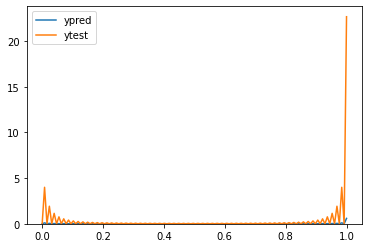

In [ ]:
sns.distplot(ypred,hist=False,label="ypred")
sns.distplot(Ytest,hist=False,label="ytest")

The graph between the predicted and the and testing values is very absurd.
Hence we will consider the confusion matrix and score for the result.

**RECALL**

TP/(TP+FN)

In [ ]:
recall=cn[0][0]/(cn[0][0]+cn[0][1])
print("The recall is",recall)

The recall is 0.8942178940961656


**PRECISION**

TP/(TP+FP)

In [ ]:
precision= cn[0][0]/(cn[0][0]+cn[1][0])
print("The preicision is",precision)

The preicision is 0.9986405655247417


In [ ]:
def printing(classifier,Xtest,Ytest):
  score=classifier.score(Xtest,Ytest)*100
  print("The score is",score,"%")
  print("")
  ypred=classifier.predict(Xtest)
  cn =confusion_matrix(ypred,Ytest)
  print("confusion matrix :")
  print(cn)
  print("")
  recall=cn[0][0]/(cn[0][0]+cn[0][1])
  print("The recall is",recall*100,"%")
  print("")
  precision= cn[0][0]/(cn[0][0]+cn[1][0])
  print("The preicision is",precision*100)

## **K-Nearest Neighbors**

We can implement a KNN model by following the below steps:

1. Load the data
2. Initialise the value of k
3. For getting the predicted class, iterate from 1 to total number of training data points
4. Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
5. Sort the calculated distances in ascending order based on distance values
6. Get top k rows from the sorted array
7. Get the most frequent class of these rows
8. Return the predicted class




Below we have implemented the KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Finding out the best random state

In [ ]:
lar={}
for i in range(1,50):
  Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
  knn=KNeighborsClassifier()
  knn.fit(Xtrain,Ytrain)
  sc=knn.score(Xtest,Ytest)*100
  lar.update({i:sc})

In [ ]:
import operator
sorted(lar.items(),key=operator.itemgetter(1),reverse=True)

[(11, 89.51201747997086),
 (9, 89.26924010682204),
 (37, 89.20854576353484),
 (23, 89.07501820830298),
 (24, 89.02646273367321),
 (33, 89.01432386501578),
 (10, 88.96576839038602),
 (45, 88.95362952172857),
 (13, 88.9293517844137),
 (7, 88.88079630978393),
 (6, 88.86865744112649),
 (19, 88.8443797038116),
 (25, 88.83224083515417),
 (21, 88.80796309783928),
 (34, 88.7836853605244),
 (8, 88.77154649186696),
 (12, 88.77154649186696),
 (39, 88.75940762320951),
 (46, 88.69871327992232),
 (22, 88.68657441126487),
 (31, 88.66229667395),
 (48, 88.62588006797768),
 (3, 88.61374119932023),
 (4, 88.58946346200534),
 (38, 88.58946346200534),
 (17, 88.5773245933479),
 (20, 88.5773245933479),
 (49, 88.56518572469045),
 (35, 88.54090798737558),
 (16, 88.52876911871813),
 (47, 88.52876911871813),
 (32, 88.51663025006069),
 (15, 88.49235251274581),
 (1, 88.45593590677349),
 (2, 88.40738043214373),
 (44, 88.35882495751396),
 (5, 88.33454722019908),
 (18, 88.27385287691187),
 (28, 88.22529740228211),
 (1

# So 11th is the best random state

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=11)

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# *RESULT FOR KNN*

In [ ]:
printing(knn,Xtest,Ytest)

The score is 89.51201747997086 %

confusion matrix :
[[7143  658]
 [ 206  231]]

The recall is 91.56518395077555 %

The preicision is 97.19689753707988


# **Support Vector Machine**

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.


In [ ]:
from sklearn.svm import SVC

Finding the best random state

In [ ]:
lar={}
for i in range(20):
  Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
  svc=SVC(kernel='rbf')
  svc.fit(Xtrain,Ytrain)
  svc.score(Xtest,Ytest)*100
  lar.update({i:sc})

In [ ]:
import operator
sorted(lar.items(),key=operator.itemgetter(1),reverse=True)

[(0, 88.56518572469045),
 (1, 88.56518572469045),
 (2, 88.56518572469045),
 (3, 88.56518572469045),
 (4, 88.56518572469045),
 (5, 88.56518572469045),
 (6, 88.56518572469045),
 (7, 88.56518572469045),
 (8, 88.56518572469045),
 (9, 88.56518572469045),
 (10, 88.56518572469045),
 (11, 88.56518572469045),
 (12, 88.56518572469045),
 (13, 88.56518572469045),
 (14, 88.56518572469045),
 (15, 88.56518572469045),
 (16, 88.56518572469045),
 (17, 88.56518572469045),
 (18, 88.56518572469045),
 (19, 88.56518572469045)]

# so 0th is best state for kernel 'rbf' and the score is 88.56 %

Since the result is almost the same for every state we might just skip the checking and try for any random state

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
svc=SVC(kernel='rbf')
svc.fit(Xtrain,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
printing(svc,Xtest,Ytest)

The score is 89.08715707696044 %

confusion matrix :
[[7302  876]
 [  23   37]]

The recall is 89.28833455612619 %

The preicision is 99.68600682593856


kernel=*'poly'*

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=11)
svc=SVC(kernel='poly')
svc.fit(Xtrain,Ytrain)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
printing(svc,Xtest,Ytest)

The score is 89.24496236950716 %

confusion matrix :
[[7349  886]
 [   0    3]]

The recall is 89.24104432301154 %

The preicision is 100.0


kernel=*'sigmoid'*

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
svc=SVC(kernel='sigmoid',gamma='scale')
svc.fit(Xtrain,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
printing(svc,Xtest,Ytest)

The score is 82.53216800194222 %

confusion matrix :
[[6659  773]
 [ 666  140]]

The recall is 89.59903121636168 %

The preicision is 90.90784982935153


kernel=*'linear'*




In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=11)
svc=SVC(kernel='linear')
svc.fit(Xtrain,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
printing(svc,Xtest,Ytest)

The score is 89.20854576353484 %

confusion matrix :
[[7349  889]
 [   0    0]]

The recall is 89.20854576353484 %

The preicision is 100.0


# **Naive Bayes**
Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

For some types of probability models, naive Bayes classifiers can be trained very efficiently in a supervised learning setting. In many practical applications, parameter estimation for naive Bayes models uses the method of maximum likelihood; in other words, one can work with the naive Bayes model without accepting Bayesian probability or using any Bayesian methods.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
bayes=GaussianNB()

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=3)

In [ ]:
bayes.fit(Xtrain,Ytrain)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
printing(bayes,Xtest,Ytest)

The score is 84.71716436028163 %

confusion matrix :
[[6702  645]
 [ 614  277]]

The recall is 91.22090649244589 %

The preicision is 91.60743575724439



# ***2.RECURSIVE FEATURE ELIMINATION***

---



---
Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class). Scikit Learn does most of the heavy lifting just import RFE from sklearn.feature_selection and pass any classifier model to the RFE() method with the number of features to select. Using familiar Scikit Learn syntax, the .fit() method must then be called.



Here we will begin with LOGISTIC REGRESSION using RFE to select important features

In [ ]:
model=LogisticRegression(solver='liblinear')
rfe=RFE(model,3)
fit=rfe.fit(X1,Y1)

In [ ]:
for col,val in zip(df.columns,fit.ranking_):
    print(col.ljust(30),val)

age                            10
job                            16
marital                        11
education                      12
default                        8
housing                        17
loan                           15
contact                        9
month                          14
day_of_week                    13
duration                       1
campaign                       3
pdays                          4
previous                       6
poutcome                       7
cons_price_idx                 1
cons_conf_idx                  5
euribor3m                      2
nr_employed                    1


The columns with ranking 1 are choosen. Hence the choosen features are 'duration', 'cons_price_idx', 'cons_conf_idx'

In [ ]:
X=df[["duration","cons_price_idx","nr_employed"]]

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=11)
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(Xtrain,Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
printing(logreg,Xtest,Ytest)

The score is 89.92473901432386 %

confusion matrix :
[[7261  742]
 [  88  147]]

The recall is 90.72847682119205 %

The preicision is 98.80255817117975


# KNN

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
knn=KNeighborsClassifier()
knn.fit(Xtrain,Ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
printing(knn,Xtest,Ytest)

The score is 90.0825443068706 %

confusion matrix :
[[6979  471]
 [ 346  442]]

The recall is 93.67785234899328 %

The preicision is 95.27645051194538


# SVC

In [ ]:
svc=SVC(kernel='rbf')
svc.fit(Xtrain,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
printing(svc,Xtest,Ytest)

The score is 89.48773974265598 %

confusion matrix :
[[7285  826]
 [  40   87]]

The recall is 89.81629885340895 %

The preicision is 99.45392491467577


In [ ]:
svc=SVC(kernel='poly')
svc.fit(Xtrain,Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
printing(svc,Xtest,Ytest)

The score is 89.90046127700899 %

confusion matrix :
[[7222  729]
 [ 103  184]]

The recall is 90.83134196956357 %

The preicision is 98.5938566552901


In [ ]:
svc=SVC(kernel='sigmoid')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)

The score is 88.91721291575625 %

confusion matrix :
[[7325  913]
 [   0    0]]

The recall is 88.91721291575625 %

The preicision is 100.0


In [ ]:
svc=SVC(kernel='linear')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)

The score is 88.97790725904345 %

confusion matrix :
[[7318  901]
 [   7   12]]

The recall is 89.037595814576 %

The preicision is 99.90443686006826


# **Naive Bayes**

In [ ]:
bayes.fit(Xtrain,Ytrain)
printing(bayes,Xtest,Ytest)

The score is 89.6091284292304 %

confusion matrix :
[[6965  496]
 [ 360  417]]

The recall is 93.35209757405174 %

The preicision is 95.08532423208192


# ***3.Principal Component Analysis***

---
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.



In [ ]:
pca=PCA(n_components=3)#3D VIzualization
fit=pca.fit(X1)
print(f"Explained Variance: {fit.explained_variance_ratio_}")

Explained Variance: [0.476 0.202 0.158]


In [ ]:
X=fit.transform(X1)

In [ ]:
X

array([[-3.023, -2.067,  4.34 ],
       [ 5.514,  1.904, -3.44 ],
       [ 0.574, -0.968, -2.054],
       ...,
       [-3.497,  0.7  , -3.063],
       [ 5.215,  3.642, -1.894],
       [ 4.076,  2.232,  0.502]])

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=11)

LOGISTIC REGRESSION

In [ ]:
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(Xtrain,Ytrain)
printing(logreg,Xtest,Ytest)

The score is 89.20854576353484 %

confusion matrix :
[[7349  889]
 [   0    0]]

The recall is 89.20854576353484 %

The preicision is 100.0


KNN

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
knn=KNeighborsClassifier()
knn.fit(Xtrain,Ytrain)
printing(knn,Xtest,Ytest)

The score is 88.38310269482884 %

confusion matrix :
[[7152  784]
 [ 173  129]]

The recall is 90.12096774193549 %

The preicision is 97.6382252559727


SVC, kernel='rbf'

In [ ]:
svc=SVC(kernel='rbf')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)

The score is 88.91721291575625 %

confusion matrix :
[[7325  913]
 [   0    0]]

The recall is 88.91721291575625 %

The preicision is 100.0


SVC kernel='poly'

In [ ]:
svc=SVC(kernel='poly')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)

The score is 88.91721291575625 %

confusion matrix :
[[7325  913]
 [   0    0]]

The recall is 88.91721291575625 %

The preicision is 100.0


SVC kernel='linear

In [ ]:
svc=SVC(kernel='linear')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)

The score is 88.91721291575625 %

confusion matrix :
[[7325  913]
 [   0    0]]

The recall is 88.91721291575625 %

The preicision is 100.0


SVM kernel='sigmoid'

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
svc=SVC(kernel='sigmoid')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)

The score is 80.56567127943676 %

confusion matrix :
[[6531  807]
 [ 794  106]]

The recall is 89.00245298446443 %

The preicision is 89.160409556314


NAIVE BAYES

In [ ]:

bayes.fit(Xtrain,Ytrain)
printing(bayes,Xtest,Ytest)

The score is 88.91721291575625 %

confusion matrix :
[[7325  913]
 [   0    0]]

The recall is 88.91721291575625 %

The preicision is 100.0


# ***4.Feature Extraction***

---





In [ ]:
model=ExtraTreesClassifier(n_estimators=100)
model.fit(X1,Y)
print(model.feature_importances_)

[0.087 0.057 0.034 0.053 0.01  0.027 0.02  0.014 0.017 0.05  0.264 0.059
 0.058 0.013 0.027 0.023 0.028 0.111 0.048]


In [ ]:
great={}
for col,val in zip(df.columns,model.feature_importances_):
    great.update({col.ljust(30):val})

In [ ]:
import operator
list(sorted(great.items(),key=operator.itemgetter(1),reverse=True))[:3]


[('duration                      ', 0.2643605625753761),
 ('euribor3m                     ', 0.1106795637851575),
 ('age                           ', 0.08692196342331898)]

In [ ]:
X=df[["duration","euribor3m","age"]]

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=11)
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(Xtrain,Ytrain)
printing(logreg,Xtest,Ytest)

The score is 90.04612770089827 %

confusion matrix :
[[7222  693]
 [ 127  196]]

The recall is 91.24447252053064 %

The preicision is 98.27187372431624


KNN

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=11)
knn=KNeighborsClassifier()
knn.fit(Xtrain,Ytrain)
printing(knn,Xtest,Ytest)

The score is 90.45884923525126 %

confusion matrix :
[[7037  474]
 [ 312  415]]

The recall is 93.68925575822128 %

The preicision is 95.75452442509184


SVC kernel='rbf'

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
svc=SVC(kernel='rbf')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)


The score is 89.9975722262685 %

confusion matrix :
[[7220  719]
 [ 105  194]]

The recall is 90.94344375865978 %

The preicision is 98.5665529010239


SVC kernel='poly'

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
svc=SVC(kernel='poly')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)

The score is 89.3420733187667 %

confusion matrix :
[[7282  835]
 [  43   78]]

The recall is 89.71294813354687 %

The preicision is 99.41296928327645


SVC kernel='sigmoid'

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=11)
svc=SVC(kernel='sigmoid')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)

The score is 83.3818888079631 %

confusion matrix :
[[6729  749]
 [ 620  140]]

The recall is 89.98395292859053 %

The preicision is 91.56347802422098


SVC kernel='linear'

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)
svc=SVC(kernel='linear')
svc.fit(Xtrain,Ytrain)
printing(svc,Xtest,Ytest)

The score is 89.14785142024763 %

confusion matrix :
[[7312  881]
 [  13   32]]

The recall is 89.24691810081778 %

The preicision is 99.82252559726963


Naive Bayes

In [ ]:
bayes.fit(Xtrain,Ytrain)
printing(bayes,Xtest,Ytest)

The score is 89.71837824714737 %

confusion matrix :
[[7080  602]
 [ 245  311]]

The recall is 92.16349908877896 %

The preicision is 96.65529010238907
